#**What is the mass of the Sun?**
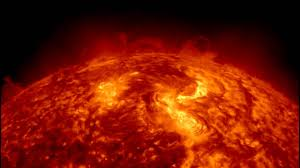

**The goal of this assignment is to use astronomical data and your knowledge of forces to determine the mass of the Sun.**

Instructions:

Make a copy of the assignmnet and  share with your partner.

Take turns driving and navigating.

Answer the questions below, fix mistakes, and write the code as indicated.

Submit one notebook per team.

*Reminders:*

To run code click on the play button next to the cell.

"#" indicates a comment or instructions.

In [ ]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy import stats

Load the 2 data file:  https://raw.githubusercontent.com/swetzler/Near-Earth-Comets/master/solar_system.csv  (compiled from NASA) and  https://raw.githubusercontent.com/swetzler/Near-Earth-Comets/master/Near-Earth_Comets_-_Orbital_Elements.csv (source: NASA's Open Data Portal).

In [ ]:
data_1 = pd.read_csv('https://raw.githubusercontent.com/swetzler/Near-Earth-Comets/master/solar_system.csv')
data_2 = pd.read_csv('https://raw.githubusercontent.com/swetzler/Near-Earth-Comets/master/Near-Earth_Comets_-_Orbital_Elements.csv')


Look at the first data file.

In [ ]:
data_1.head(3) # Show first (3) from the data set

,Unnamed: 0,Mass,Distance_from_Sun,Orbital_period,Orbital_speed,eccentricity,Inclination,Rotation
0,Mercury,3.300000e+23,0.3871,0.2408,47.9,0.206,7.00,58.65
1,Venus,4.870000e+24,0.7233,0.6152,35.0,0.007,3.39,-243.01*
2,Earth,5.970000e+24,1.0000,1.0000,29.8,0.017,0.00,0.997


How many near-Earth objects are there that orbit the Sun? (The number of objects in this data set.)

In [ ]:
len(data_1)

15

Look at the data from the 2nd set.

In [ ]:
 data_2.head(3) # Show first (3) from the data set

,Object,Epoch (TDB),TP (TDB),e,i (deg),w (deg),Node (deg),q (AU),Q (AU),P (yr),MOID (AU),A1 (AU/d^2),A2 (AU/d^2),A3 (AU/d^2),DT (d),ref,Object_name
0,P/2004 R1 (McNaught),54629,2455248.548,0.682527,4.894556,0.626838,295.985450,0.986192,5.23,5.48,0.027011,NaN,NaN,NaN,NaN,20,P/2004 R1 (McNaught)
1,P/2008 S1 (Catalina-McNaught),55101,2454741.329,0.666313,15.100746,203.649023,111.392003,1.190642,5.95,6.74,0.194101,NaN,NaN,NaN,NaN,13,P/2008 S1 (Catalina-McNaught)
2,1P/Halley,49400,2446467.395,0.967143,162.262691,111.332485,58.420081,0.585978,35.08,75.32,0.063782,2.700000e-10,1.550000e-10,NaN,NaN,J863/77,1P/Halley


How many other objects orbit the sun?

In [ ]:
len(data_2)

160

Identify data to graph. Show all work.

**Answer Here:** *(By setting Fc = FG and solving, plot distance from Sun $^3$ vs. orbital period $^2$)*

Look at the data file and determine what units are being used for each of the columns needed for the calculation.

**Answer Here:**
(Distance from Sun is in AU, orbital period is in years)*

Convert units into SI, as needed.

In [ ]:
data_1['T1']=data_1['Orbital_period']*3.154*10**7 # into s
data_1['R1'] = data_1['Distance_from_Sun']*1.496*10**11 # into m

In [ ]:
data_2['T2']=data_2['P (yr)']*3.154*10**7 # into s
data_2['R2'] = (data_2['Q (AU)'] + data_2['q (AU)'])*7.48*10**10 # into m

Define necessary constants.

In [ ]:
G=6.67*10**-11
C = 4*math.pi**2/G

Write code to create new columns with data to graph.

In [ ]:
data_1['T1^2'] = data_1['T1']**2
data_1['R1^3'] = data_1['R1']**3
data_1['CR1^3'] = data_1['R1^3']*C
data_1.head(3)

,Unnamed: 0,Mass,Distance_from_Sun,Orbital_period,Orbital_speed,eccentricity,Inclination,Rotation,T1,R1,T1^2,R1^3,CR1^3
0,Mercury,3.300000e+23,0.3871,0.2408,47.9,0.206,7.00,58.65,7594832.0,5.791016e+10,5.768147e+13,1.942067e+32,1.149471e+44
1,Venus,4.870000e+24,0.7233,0.6152,35.0,0.007,3.39,-243.01*,19403408.0,1.082057e+11,3.764922e+14,1.266923e+33,7.498667e+44
2,Earth,5.970000e+24,1.0000,1.0000,29.8,0.017,0.00,0.997,31540000.0,1.496000e+11,9.947716e+14,3.348072e+33,1.981658e+45


In [ ]:
data_2['T2^2'] = data_2['T2']**2
data_2['R2^3'] = data_2['R2']**3
data_2['CR2^3'] = data_2['R2^3']*C
data_2.head(3)

,Object,Epoch (TDB),TP (TDB),e,i (deg),w (deg),Node (deg),q (AU),Q (AU),P (yr),...,A2 (AU/d^2),A3 (AU/d^2),DT (d),ref,Object_name,T2,R2,T2^2,R2^3,CR2^3
0,P/2004 R1 (McNaught),54629,2455248.548,0.682527,4.894556,0.626838,295.985450,0.986192,5.23,5.48,...,NaN,NaN,NaN,20,P/2004 R1 (McNaught),1.728392e+08,4.649712e+11,2.987339e+16,1.005259e+35,5.949931e+46
1,P/2008 S1 (Catalina-McNaught),55101,2454741.329,0.666313,15.100746,203.649023,111.392003,1.190642,5.95,6.74,...,NaN,NaN,NaN,13,P/2008 S1 (Catalina-McNaught),2.125796e+08,5.341200e+11,4.519009e+16,1.523760e+35,9.018834e+46
2,1P/Halley,49400,2446467.395,0.967143,162.262691,111.332485,58.420081,0.585978,35.08,75.32,...,1.550000e-10,NaN,NaN,J863/77,1P/Halley,2.375593e+09,2.667815e+12,5.643441e+18,1.898747e+37,1.123831e+49


Plot both sets of data. Use guess and check to adjust the slope of the line of best fit. Rerun the step until you are satisfied with the graph. The physical significance of this value is the mass of the sun in kg.

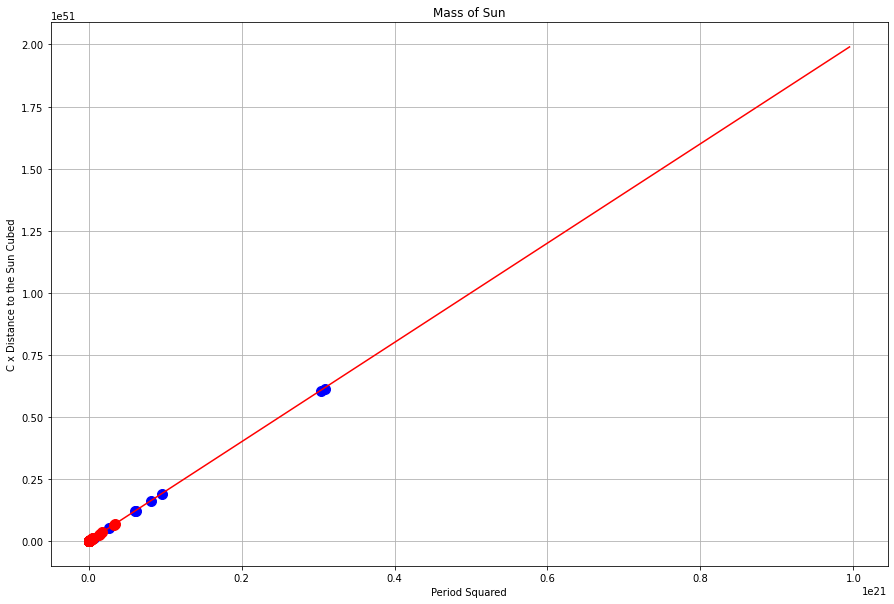

In [ ]:
# line of best fit parameters
xmin = 0  # lower bound for your plot
xmax = 10**21 # upper bound for your plot
slope = 2*10**30 # est of slope (will be very large, use sci. not.)
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = slope * x # calculates the y-values

# make the plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
plt.plot(data_1['T1^2'],data_1['CR1^3'],linestyle='', marker='o', color='b', markersize=10)
plt.plot(data_2['T2^2'],data_2['CR2^3'],linestyle='', marker='o', color='r', markersize=10)
ax.plot(x, y, color='r')  # plots the curve
plt.xlabel('Period Squared')
plt.ylabel('C x Distance to the Sun Cubed')
plt.title('Mass of Sun')
plt.grid(True) #shows gridlines
plt.show()

What is the mass of the Sun (slope of the line of best fit)?

In [ ]:
# fill in calculated value
m = 2.0*10**30

Using a linear egression is more accurate than guess and check.

In [ ]:
from sklearn import linear_model

In [ ]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(data_1["T1^2"]),
                     y = data_1["CR1^3"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients. The second value is the slope of the line.
print(regression_model.coef_)

2.2489719215171606e+46
[1.99073174e+30]


Let's compare your result to the actual value: https://en.wikipedia.org/wiki/Sun Enter the actual value below.

In [ ]:
# fill in actual value
a = 1.9885*10**30

Calculate the percent error.

In [ ]:
pe = ((m-a)*100/(a))
print(round(pe,2)) # rounds the answer to 2 decimal places

0.58


Follow Up:

1. Explain how to determine the mass of the Earth.

**Answer here:** (You would need information about Earth's satellites, periods and distances)

**Don't forget to save your work and share a copy with me.**

Extension:

NewsFlash: NASA is making an artifical planet, New Earth, for scientists and their cats to evacuate to after Earth becomes inhabitable. Write another Notebook using the same data file to determine the orbital speed and orbital period of New Earth if it will be located 2.3 AU from the sun.